# Info
The 'Sentinel-5P NRTI NO2: Near Real-Time Nitrogen Dioxide' dataset is used for the present analysis. The dataset is directly imported from the Google Earth Engine's (GEE) Image collection. A python package(geemap) of GEE API has been used for the analysis.

In [1]:
import geemap   # Please update the geemap package for a better experience
import ee
import os
ee.Initialize()

In [2]:
Map = geemap.Map(center = [23, 79], zoom=4)
Map

Map(center=[23, 79], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

# NO2 Analysis over India

In [3]:
# Importing the India shapefile and adding to map as a layer
IND_shp = 'Input/india_SHP.shp'
India = geemap.shp_to_ee(IND_shp)

Map.addLayer(India, {}, 'IND')

In [4]:
##Importing NO2 data (tropospheric NO2 column number density in mol/m^2) from GEE Image collection
NO2 = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('tropospheric_NO2_column_number_density')

In [5]:
##Long term analysis (comparison of 2019 and 2020)
NO2_2019 = NO2.filterDate('2019-01-01', '2019-12-31').mean().multiply(1e6).clip(India) # converted from mol/m^2 into µmol/m^2
NO2_2020 = NO2.filterDate('2020-01-01', '2020-12-31').mean().multiply(1e6).clip(India)

In [6]:
vizParams = {
  'min': 0,
  'max': 100,
  'palette': ['blue','aqua',  'yellow', 'orange', 'red']
}

Map.addLayer(NO2_2019, vizParams, 'NO2_2019')
Map.addLayer(NO2_2020, vizParams, 'NO2_2020')
palette = ['blue','aqua', 'yellow', 'orange', 'red']
Map.add_colorbar(palette, vmin=0, vmax=100, layer_name='NO2', position='bottomright')

## All layers can be visulaize using the layer tool at the top-right corner of map

In [7]:
# Lockdown was imposed for a short time-period but its impact can be experienced for the whole year 2020
# A comparision of NO2 concentration for years 2019 and 2020
left_layer = geemap.ee_tile_layer(NO2_2019, vizParams, 'NO2 2019')
right_layer = geemap.ee_tile_layer(NO2_2020, vizParams, 'NO2 2020')

Map_1 = geemap.Map(center = [23, 79], zoom=4)
Map_1.split_map(left_layer, right_layer)
Map_1

Map(center=[23, 79], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [8]:
# Exporting the maps
# All files will automatically downloaded in user's Download folder or one can also download by clicking the link at the desired location.

out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename_1 = os.path.join(out_dir, 'NO2_2019.tif')
filename_2= os.path.join(out_dir, 'NO2_2020.tif')
roi = India.geometry()

geemap.ee_export_image(NO2_2019, filename=filename_1, scale= 5000, region=roi ,file_per_band=False) #reducing the scale from 1000m to 5000m to avoid the computational error
geemap.ee_export_image(NO2_2020, filename=filename_2, scale= 5000, region=roi ,file_per_band=False)

# Additionally, We can directly Export Maps to Google drive
#geemap.ee_export_image_to_drive(NO2_2019, description='NO2_2019', folder='GeeMap', region=India, scale=1000)
#geemap.ee_export_image_to_drive(NO2_2020, description='NO2_2020', folder='GeeMap', region=India, scale=1000)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Shruti\Downloads\NO2_2019.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Shruti\Downloads\NO2_2020.tif


In [9]:
## Lockdown was imposed between 25 March to 31 May in four phases, so 25 March to 31 May period is taken for the analysis

lock_2019 = NO2.filterDate('2019-03-25', '2019-05-31').mean().multiply(1e6).clip(India)
lock_2020 = NO2.filterDate('2020-03-25', '2020-05-31').mean().multiply(1e6).clip(India)

Map.addLayer(lock_2019, vizParams, 'lock_2019')
Map.addLayer(lock_2020, vizParams, 'lock_2020')

In [10]:
#Exporting the Maps
filename_3 = os.path.join(out_dir, 'lock_2019.tif')
filename_4= os.path.join(out_dir, 'lock_2020.tif')
geemap.ee_export_image(lock_2019, filename=filename_3, scale= 5000, region=roi ,file_per_band=False)
geemap.ee_export_image(lock_2020, filename=filename_4, scale= 5000, region=roi ,file_per_band=False)


In [11]:
#/Lockdown impacts on NO2
Pre_NO2 = NO2.filterDate('2020-03-01', '2020-03-24').mean().multiply(1e6).clip(India)

phase_I_NO2 = NO2.filterDate('2020-03-25', '2020-04-14').mean().multiply(1e6).clip(India)

phase_II_NO2 = NO2.filterDate('2020-04-15', '2020-05-03').mean().multiply(1e6).clip(India)

phase_III_NO2 = NO2.filterDate('2020-05-04', '2020-05-17').mean().multiply(1e6).clip(India)

phase_IV_NO2 = NO2.filterDate('2020-05-18', '2020-05-31').mean().multiply(1e6).clip(India)

In [12]:
Map.addLayer(Pre_NO2, vizParams, 'Pre_NO2')
Map.addLayer(phase_I_NO2, vizParams, 'phase_I_NO2')
Map.addLayer(phase_II_NO2, vizParams, 'phase_II_NO2')
Map.addLayer(phase_III_NO2, vizParams, 'phase_III_NO2')
Map.addLayer(phase_IV_NO2, vizParams, 'phase_IV_NO2')

In [13]:
filename_5 = os.path.join(out_dir, 'Pre_NO2.tif')
filename_6= os.path.join(out_dir, 'phase_I_NO2.tif')
filename_7 = os.path.join(out_dir, 'phase_II_NO2.tif')
filename_8= os.path.join(out_dir, 'phase_III_NO2.tif')
filename_9= os.path.join(out_dir, 'phase_IV_NO2.tif')

#Exporting the files
geemap.ee_export_image(Pre_NO2, filename=filename_5, scale= 5000, region=roi, file_per_band=False)
geemap.ee_export_image(phase_I_NO2, filename=filename_6, scale= 5000, region=roi, file_per_band=False)
geemap.ee_export_image(phase_II_NO2, filename=filename_7, scale= 5000, region=roi, file_per_band=False)
geemap.ee_export_image(phase_III_NO2, filename=filename_8, scale= 5000, region=roi, file_per_band=False)
geemap.ee_export_image(phase_IV_NO2, filename=filename_9, scale= 5000, region=roi, file_per_band=False)

# NO2 Analysis over Delhi

In [14]:
Map_2 = geemap.Map(center = [28.70, 77.10], zoom=10)
# Adding the Delhi shape file as a map layer
Delhi_shp = 'Input/Delhi.shp'
Delhi = geemap.shp_to_ee(Delhi_shp)
Map_2.addLayer(Delhi, {}, 'Delhi')
Map_2

Map(center=[28.7, 77.1], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=…

In [15]:
#Lockdown impact over Delhi NO2 level in different phases
Pre_NO2_Delhi = NO2.filterDate('2020-03-01', '2020-03-24').mean().multiply(1e6).clip(Delhi);

phase_I_NO2_Delhi = NO2.filterDate('2020-03-25', '2020-04-14').mean().multiply(1e6).clip(Delhi);

phase_II_NO2_Delhi = NO2.filterDate('2020-04-15', '2020-05-03').mean().multiply(1e6).clip(Delhi);

phase_III_NO2_Delhi = NO2.filterDate('2020-05-04', '2020-05-17').mean().multiply(1e6).clip(Delhi);

phase_IV_NO2_Delhi = NO2.filterDate('2020-05-18', '2020-05-31').mean().multiply(1e6).clip(Delhi);

In [16]:
Map_2.addLayer(Pre_NO2_Delhi, vizParams, 'Pre_NO2_Delhi');
Map_2.addLayer(phase_I_NO2_Delhi, vizParams, 'phase_I_NO2_Delhi');
Map_2.addLayer(phase_II_NO2_Delhi, vizParams, 'phase_II_NO2_Delhi');
Map_2.addLayer(phase_III_NO2_Delhi, vizParams, 'phase_III_NO2_Delhi');
Map_2.addLayer(phase_IV_NO2_Delhi, vizParams, 'phase_IV_NO2_Delhi');

palette = ['blue','aqua', 'yellow', 'orange', 'red']
Map_2.add_colorbar(palette, vmin=0, vmax=100, layer_name='NO2', position='bottomright')

In [17]:
filename_10 = os.path.join(out_dir, 'Pre_NO2_Delhi.tif')
filename_11= os.path.join(out_dir, 'phase_I_NO2_Delhi.tif')
filename_12 = os.path.join(out_dir, 'phase_II_NO2_Delhi.tif')
filename_13= os.path.join(out_dir, 'phase_III_NO2_Delhi.tif')
filename_14= os.path.join(out_dir, 'phase_IV_NO2_Delhi.tif')

roi_1 = Delhi.geometry()

#Exporting the files
geemap.ee_export_image(Pre_NO2_Delhi, filename=filename_10, scale= 30, region=roi_1, file_per_band=False)
geemap.ee_export_image(phase_I_NO2_Delhi, filename=filename_11, scale= 30, region=roi_1, file_per_band=False)
geemap.ee_export_image(phase_II_NO2_Delhi, filename=filename_12, scale= 30, region=roi_1, file_per_band=False)
geemap.ee_export_image(phase_III_NO2_Delhi, filename=filename_13, scale= 30, region=roi_1, file_per_band=False)
geemap.ee_export_image(phase_IV_NO2_Delhi, filename=filename_14, scale= 30, region=roi_1, file_per_band=False)


# NO2 Analysis over Banglore

In [18]:
# Opening a new map and adding the Bangalore shape file as a layer
Map_3 = geemap.Map(center = [12.98, 77.59], zoom=10)

Bang_shp = 'Input/Banglore_urban.shp'
Bang = geemap.shp_to_ee(Bang_shp)
Map_3.addLayer(Bang, {}, 'Bang')
Map_3

Map(center=[12.98, 77.59], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [19]:
#Lockdown impact over Bangalore NO2 level
Pre_NO2_Bang = NO2.filterDate('2020-03-01', '2020-03-24').mean().multiply(1e6).clip(Bang);

phase_I_NO2_Bang = NO2.filterDate('2020-03-25', '2020-04-14').mean().multiply(1e6).clip(Bang);

phase_II_NO2_Bang = NO2.filterDate('2020-04-15', '2020-05-03').mean().multiply(1e6).clip(Bang);

phase_III_NO2_Bang = NO2.filterDate('2020-05-04', '2020-05-17').mean().multiply(1e6).clip(Bang);

phase_IV_NO2_Bang = NO2.filterDate('2020-05-18', '2020-05-31').mean().multiply(1e6).clip(Bang);

In [20]:
Map_3.addLayer(Pre_NO2_Bang, vizParams, 'Pre_NO2_Bang');
Map_3.addLayer(phase_I_NO2_Bang, vizParams, 'phase_I_NO2_Bang');
Map_3.addLayer(phase_II_NO2_Bang, vizParams, 'phase_II_NO2_Bang');
Map_3.addLayer(phase_III_NO2_Bang, vizParams, 'phase_III_NO2_Bang');
Map_3.addLayer(phase_IV_NO2_Bang, vizParams, 'phase_IV_NO2_Bang');

palette = ['blue','aqua', 'yellow', 'orange', 'red']
Map_3.add_colorbar(palette, vmin=0, vmax=100, layer_name='NO2', position='bottomright')

In [21]:
filename_15 = os.path.join(out_dir, 'Pre_NO2_Bang.tif')
filename_16= os.path.join(out_dir, 'phase_I_NO2_Bang.tif')
filename_17 = os.path.join(out_dir, 'phase_II_NO2_Bang.tif')
filename_18= os.path.join(out_dir, 'phase_III_NO2_Bang.tif')
filename_19= os.path.join(out_dir, 'phase_IV_NO2_Bang.tif')

roi_2 = Bang.geometry()

#Exporting the files
geemap.ee_export_image(Pre_NO2_Bang, filename=filename_15, scale= 30, region=roi_2, file_per_band=False)
geemap.ee_export_image(phase_I_NO2_Bang, filename=filename_16, scale= 30, region=roi_2, file_per_band=False)
geemap.ee_export_image(phase_II_NO2_Bang, filename=filename_17, scale= 30, region=roi_2, file_per_band=False)
geemap.ee_export_image(phase_III_NO2_Bang, filename=filename_18, scale= 30, region=roi_2, file_per_band=False)
geemap.ee_export_image(phase_IV_NO2_Bang, filename=filename_19, scale= 30, region=roi_2, file_per_band=False)


# Time_Series Analysis

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

In [23]:
# Creatind a buffer of 500 m around our Point Of Interest (Lodhi Road CPCB station, Delhi and BTM Banglore station)
roi = ee.Geometry.Point(28.70, 77.10).buffer(500)       # Lodhi Road CPCB, Delhi
#roi = ee.Geometry.Point(12.91, 77.59).buffer(500)       # coardinate for the BTM Layout, Banglore-CPCB station
No2 = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2') \
              .filter(ee.Filter.Or(
                  ee.Filter.date('2019-03-01', '2019-05-31'),
                  ee.Filter.date('2020-03-01', '2020-05-31')))
# We will extract the NO2 levels at these locations to compare with the AQI obsewrvations
#Here data is exported only for the Delhi location, in the similar way we can export for the Bangalore station

In [24]:
#For the time-series we can't deal with an image collection, so will create a function that takes a single image as an input and 
#reduces the data in a given region (roi). We’ll get the mean of the pixels in 500 m buffer and set the scale to 30.
#We’ll then need to set this reduced info as a property (let's say “mean”) in our image so that the output of our function 
#is to get the mean NO2 of a particular region, and add this as a property on our image along with the date.

def roi_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=roi, scale=30).get('tropospheric_NO2_column_number_density')
    return img.set('date', img.date().format()).set('mean',mean)

In [25]:
# Now, We will map this function to every image in our collection to get a new ImageCollection
roi_reduced_imgs = No2.map(roi_mean)  #for Delhi

In [26]:
#To convert into a pandas dataframe, we don't want an ImageCollection;  
#so we will reduce our images to a list of lists:
#for each image, there are 2-element list that contains that images date and mean_NO2 value (for our roi)
#each of these lists are themselves elements in our outer list, which is what we’ll convert into a dataframe

imgs_list = roi_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)


In [27]:
# converring into a df
df = pd.DataFrame(imgs_list.getInfo(), columns=['date','mean'])

#df

In [28]:
# converting from datetime to date coloumn
df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date')

#df

In [29]:
#df.to_csv('Output/Delhi.csv')

In [30]:
df = pd.read_excel('Input/NO2.xlsx', sheet_name='Delhi')
# This file contains data for both locatins Delhi and Bangalore

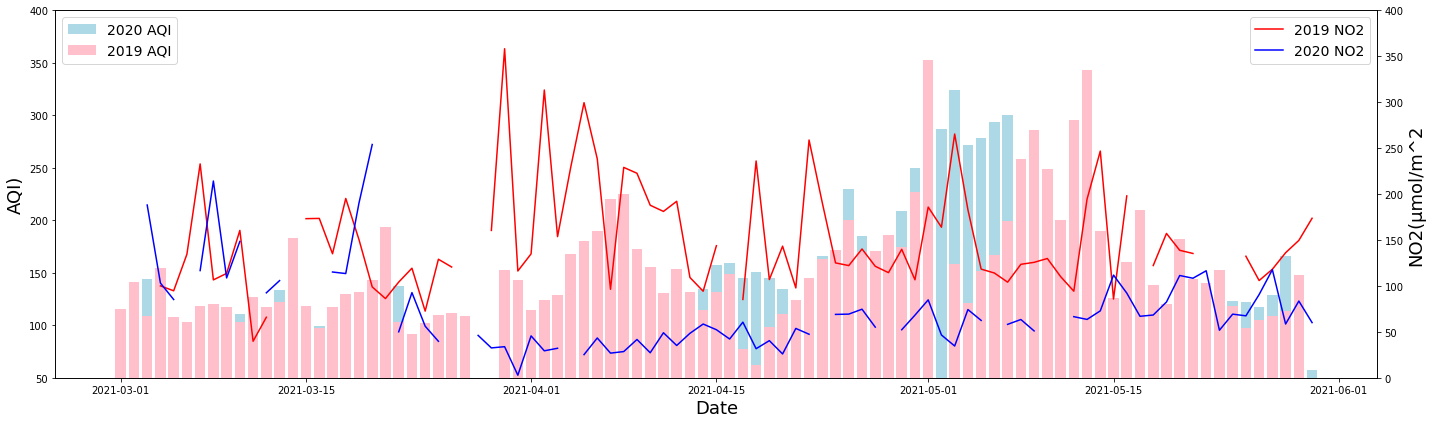

In [31]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('AQI)', fontsize=18)
ax.set_ylim(50, 400)

ax.bar(df['Date'], df['AQI_2020'], color='lightblue', label='2020 AQI', align='center')
ax.bar(df['Date'], df['AQI_2019'], color='pink', label='2019 AQI', align='center')

ax.legend(loc='upper left', fontsize=14)
ax.tick_params(axis='y')


ax1 = ax.twinx()  # initiate a second axes that shares the same x-axis

ax1.set_ylabel('NO2(µmol/m^2', fontsize=18)  # we already handled the x-label with ax
ax1.set_ylim(0, 400)
ax1.plot(df['Date'], df['NO2_2019'], color='red', label='2019 NO2' )
ax1.plot(df['Date'], df['NO2_2020'], color='blue', label='2020 NO2')

ax1.legend(loc='upper right', fontsize=14)
ax1.tick_params(axis='y')



fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig('Output/Delhi.png', dpi=500, bbox_inches='tight')
plt.show()  

In [32]:
df = pd.read_excel('Input/NO2.xlsx', sheet_name='Banglore')

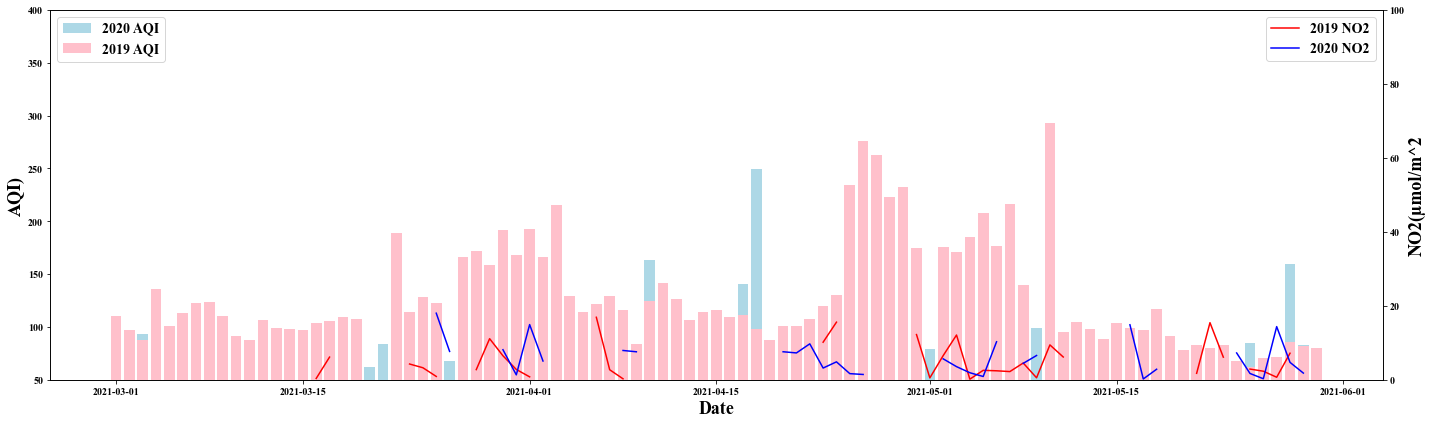

In [33]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('AQI)', fontsize=18)
ax.set_ylim(50, 400)

ax.bar(df['Date'], df['AQI_2020'], color='lightblue', label='2020 AQI', align='center')
ax.bar(df['Date'], df['AQI_2019'], color='pink', label='2019 AQI', align='center')

ax.legend(loc='upper left', fontsize=14)
ax.tick_params(axis='y')


ax1 = ax.twinx()  # initiate a second axes that shares the same x-axis

ax1.set_ylabel('NO2(µmol/m^2', fontsize=18)  # we already handled the x-label with ax
ax1.set_ylim(0, 100)
ax1.plot(df['Date'], df['NO2_2019'], color='red', label='2019 NO2' )
ax1.plot(df['Date'], df['NO2_2020'], color='blue', label='2020 NO2')

ax1.legend(loc='upper right', fontsize=14)
ax1.tick_params(axis='y')



fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig('Output/Bang.png', dpi=500, bbox_inches='tight')
plt.show()  